In [139]:
from sklearn import datasets
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
import seaborn as sns; sns.set()
import numpy as np
from sklearn.utils import shuffle
iris = datasets.load_iris()

In [140]:
X = iris.data
Y = iris.target
X, Y = shuffle(X, Y, random_state=0)

In [158]:
Y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2,
       0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [168]:
train_X = X[:-140]
train_Y = Y[:-140]
test_X = X[-140:]
test_Y = Y[-140:]

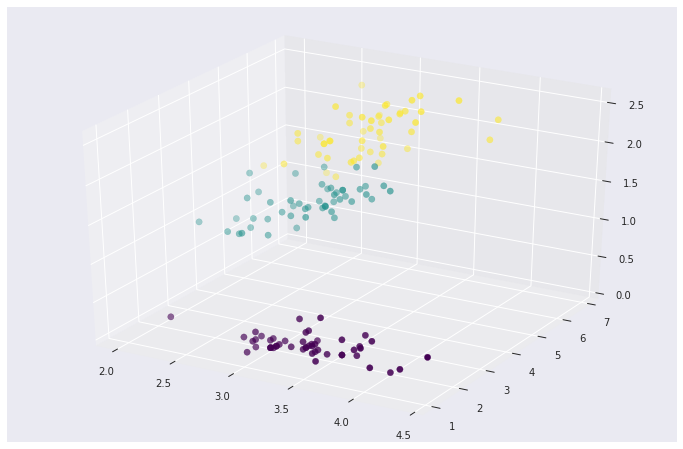

In [169]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], X[:,3], zdir='z',c=Y, s=40, cmap='viridis')

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


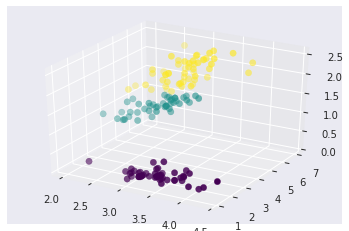

In [170]:
from sklearn.mixture import GMM
gmm = GMM(n_components=3, covariance_type="full").fit(X)
gmmlabels = gmm.predict(X)
fig = plt.figure()
axgmm = fig.add_subplot(111, projection='3d')
axgmm.scatter(X[:,1], X[:,2], X[:,3], zdir='z', c=gmmlabels, s=40, cmap='viridis')

In [187]:
sample_X = gmm.sample(1000, random_state=1329)
sample_Y = gmm.predict(sample_X)

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [199]:
from sklearn.svm import LinearSVC
reg = LinearSVC()
reg.fit (train_X, train_Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [200]:
pred = reg.predict(test_X)

In [201]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y, pred)

0.11428571428571428

array([2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0,
       2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0,
       1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

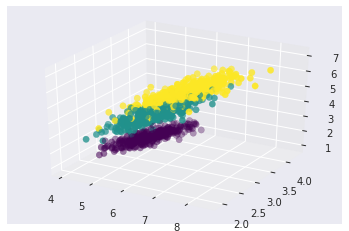

In [202]:
fig = plt.figure()
axgmm = fig.add_subplot(111, projection='3d')
axgmm.scatter(sample_X[:,0], sample_X[:,1], sample_X[:,2], zdir='z', c=sample_Y, s=40, cmap='viridis')

In [249]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(penalty=None,verbose=1, n_iter=10)
clf.fit(np.append(train_X, sample_X, axis=0), np.append(train_Y, sample_Y, axis=0), sample_weight=[0.9 if i <len(train_X) else 0.1 for i in range(len(train_X)+len(sample_X))])

-- Epoch 1
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 1010, Avg. loss: 0.141060
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 2020, Avg. loss: 0.070530
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 3030, Avg. loss: 0.047020
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 4040, Avg. loss: 0.035265
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 5050, Avg. loss: 0.028212
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 6060, Avg. loss: 0.023510
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 7070, Avg. loss: 0.020151
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 8080, Avg. loss: 0.017632
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.56, NNZs: 4, Bias: 0.984254, T: 9090, Avg. loss: 0.015673
Total training tim

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty=None, power_t=0.5, random_state=None, shuffle=True,
       verbose=1, warm_start=False)

In [250]:
pred_GMM = clf.predict(test_X)
mean_squared_error(test_Y, pred_GMM)

0.035714285714285712